In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


## Loading training data

In [4]:
datadir = "./data/"
df1 = pd.read_csv(datadir + "datatest.txt")
df2 = pd.read_csv(datadir + "datatest2.txt")
dft = pd.read_csv(datadir + "datatraining.txt")

## Naive Bayes

#### Train Naive Bayes

In [5]:
# remove date and occupancy
Xcols = dft.columns.values[1:-1]
# create input array
X = dft[Xcols].to_numpy()
print(Xcols)
print(X.shape)

# occupancy array
ycol = dft.columns.values[-1]
y = dft[ycol].to_numpy()
print(ycol)
print(y.shape)



# create test input arrays
X_test1 = df1[Xcols].to_numpy()
X_test2 = df2[Xcols].to_numpy()


# occupancy test arrays
y_test1 = df1[ycol].to_numpy()
y_test2 = df2[ycol].to_numpy()

['Temperature' 'Humidity' 'Light' 'CO2' 'HumidityRatio']
(8143, 5)
Occupancy
(8143,)


In [6]:
gnb = GaussianNB()

gnb.fit(X,y)


GaussianNB()

#### Test Naive Bayes

On Training set

In [7]:

yhat = gnb.predict(X)
error2 = np.sum((yhat - y)**2)/len(y)

proba_hat = gnb.predict_proba(X) # [P_unoccupied, P_occupied]
proba_hat_occupied = proba_hat[:, 1][y==1]
proba_hat_unoccupied = proba_hat[:, 1][y==0]


fig = go.Figure()
fig.add_trace(go.Histogram(x=proba_hat_occupied, name="Occupied", histnorm="percent"))
fig.add_trace(go.Histogram(x=proba_hat_unoccupied, name="Unoccupied", histnorm="percent"))
fig.update_layout(
    barmode='overlay',
    template='plotly_white',
    title='Probability of predicted Occupancy on occupied and unoccupied rooms (Training Set)')
fig.update_traces(opacity=0.75)
fig.show()


print(f"Squared error on training set : {round(error2*100, 1)} %" )
# print("Log probas: ",gnb.predict_log_proba(X))

Squared error on training set : 2.2 %


On testing set 1

In [8]:

yhat_test1 = gnb.predict(X_test1)
error2_test1 = np.sum((yhat_test1 - y_test1)**2)/len(y_test1)

proba_hat_test1 = gnb.predict_proba(X_test1) # [P_unoccupied, P_occupied]
proba_hat_occupied_test1 = proba_hat_test1[:, 1][y_test1==1]
proba_hat_unoccupied_test1 = proba_hat_test1[:, 1][y_test1==0]


fig = go.Figure()
fig.add_trace(go.Histogram(x=proba_hat_occupied_test1, name="Occupied", histnorm="percent"))
fig.add_trace(go.Histogram(x=proba_hat_unoccupied_test1, name="Unoccupied", histnorm="percent"))
fig.update_layout(
    barmode='overlay',
    template='plotly_white',
    title='Probability of predicted Occupancy on occupied and unoccupied rooms (Testing Set 1)')
fig.update_traces(opacity=0.75)
fig.show()


print(f"Squared error on testing set 1 : {round(error2_test1*100, 1)} %" )


Squared error on testing set 1 : 2.3 %


On testing set 2

In [9]:

yhat_test2 = gnb.predict(X_test2)
error2_test2 = np.sum((yhat_test2 - y_test2)**2)/len(y_test2)

proba_hat_test2 = gnb.predict_proba(X_test2) # [P_unoccupied, P_occupied]
proba_hat_occupied_test2 = proba_hat_test2[:, 1][y_test2==1]
proba_hat_unoccupied_test2 = proba_hat_test2[:, 1][y_test2==0]


fig = go.Figure()
fig.add_trace(go.Histogram(x=proba_hat_occupied_test2, name="Occupied", histnorm="percent"))
fig.add_trace(go.Histogram(x=proba_hat_unoccupied_test2, name="Unoccupied", histnorm="percent"))
fig.update_layout(
    barmode='overlay',
    template='plotly_white',
    title='Probability of predicted Occupancy on occupied and unoccupied rooms (Testing Set 2)')
fig.update_traces(opacity=0.75)
fig.show()


print(f"Squared error on testing set 2 : {round(error2_test2*100, 1)} %" )


Squared error on testing set 2 : 1.2 %


## Random Forest

#### Train Random Forest

In [10]:

rf = RandomForestClassifier(n_estimators=101, criterion='entropy')
rf.fit(X,y)


RandomForestClassifier(criterion='entropy', n_estimators=101)

#### Test Random Forest

In [11]:
# on training set
yhat_rf = rf.predict(X)
error2_rf = np.sum((yhat_rf - y)**2)/len(y)

print(f"Squared error on training set : {round(error2_rf*100, 1)} %" )




# on testing set 1
yhat_rf_test1 = rf.predict(X_test1)
error2_rf_test1 = np.sum((yhat_rf_test1 - y_test1)**2)/len(y_test1)

print(f"Squared error on training set : {round(error2_rf_test1*100, 1)} %" )




# on testing set 2
yhat_rf_test2 = rf.predict(X_test2)
error2_rf_test2 = np.sum((yhat_rf_test2 - y_test2)**2)/len(y_test2)

print(f"Squared error on training set : {round(error2_rf_test2*100, 1)} %" )

Squared error on training set : 0.0 %
Squared error on training set : 4.8 %
Squared error on training set : 4.4 %


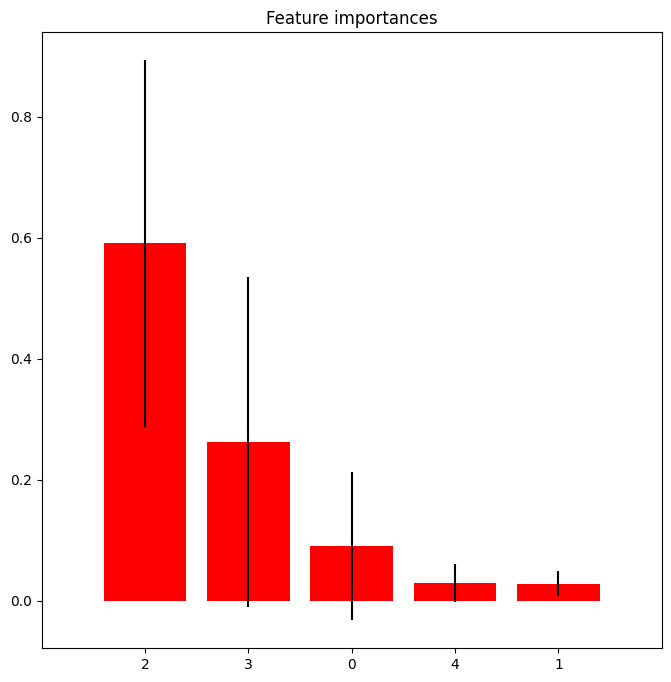

In [15]:
# Feature importance
import matplotlib.pyplot as plt

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


On remarque que la feature la plus importante pour classifier les échantillons port sur la luminosité ('Ligth') ce qui est cohérent avec l'exploration préliminaire des données qui montrait une certaine décorrélation avec les autres paramètre ainsi qu'une plus grande discrimination selon la classe (occupé ou non).

## Test de tous les params possibles de random forest

In [12]:
criterias = ["gini", "entropy", "log_loss"]
ntrees = [25, 50, 100, 150, 200]
max_depths=[4, 5, 10, None]
parameters = []
err1 = []
err2 = []

for c in criterias :
    for n in ntrees :
        for d in max_depths :
            rf = RandomForestClassifier(n_estimators=n, criterion=c, max_depth=d)
            rf.fit(X,y)
            print("\n===================")
            print(f"Testing with parameters {n} trees, {c}, depth {d}")
            # on training set
            yhat_rf = rf.predict(X)
            error2_rf = np.sum((yhat_rf - y)**2)/len(y)
            print(f"Squared error on training set  : {round(error2_rf*100, 1)} %" )
            # on testing set 1
            yhat_rf_test1 = rf.predict(X_test1)
            error2_rf_test1 = np.sum((yhat_rf_test1 - y_test1)**2)/len(y_test1)
            print(f"Squared error on testing set 1 : {round(error2_rf_test1*100, 1)} %" )
            # on testing set 2
            yhat_rf_test2 = rf.predict(X_test2)
            error2_rf_test2 = np.sum((yhat_rf_test2 - y_test2)**2)/len(y_test2)
            print(f"Squared error on testing set 2 : {round(error2_rf_test2*100, 1)} %" )

            # store results
            parameters.append(f"trees:{n}, crit:{c}, depth:{d}")
            err1.append(round(error2_rf_test1*100, 2))
            err2.append(round(error2_rf_test2*100, 2))



Testing with parameters 25 trees, gini, depth 4
Squared error on training set  : 1.1 %
Squared error on testing set 1 : 2.2 %
Squared error on testing set 2 : 2.4 %

Testing with parameters 25 trees, gini, depth 5
Squared error on training set  : 0.9 %
Squared error on testing set 1 : 2.2 %
Squared error on testing set 2 : 1.6 %

Testing with parameters 25 trees, gini, depth 10
Squared error on training set  : 0.1 %
Squared error on testing set 1 : 5.3 %
Squared error on testing set 2 : 3.5 %

Testing with parameters 25 trees, gini, depth None
Squared error on training set  : 0.0 %
Squared error on testing set 1 : 3.6 %
Squared error on testing set 2 : 2.4 %

Testing with parameters 50 trees, gini, depth 4
Squared error on training set  : 1.0 %
Squared error on testing set 1 : 2.2 %
Squared error on testing set 2 : 3.0 %

Testing with parameters 50 trees, gini, depth 5
Squared error on training set  : 0.9 %
Squared error on testing set 1 : 4.1 %
Squared error on testing set 2 : 2.6 %


In [13]:
# plot results depending on parameters
xparams = np.arange(len(parameters))
# error metrics (?)
yparams = (np.array(err1)*len(y_test1) + np.array(err2)*len(y_test2)) / (len(y_test1) + len(y_test2))


df = pd.DataFrame({"trial":xparams, "error %":yparams, "params":parameters})

# bin error metrics in category
df['Error range'] = pd.cut(df['error %'], [0, 1, 2, 3, 4, 5, np.inf], labels=None)
# fitness
df["fitness"] = np.max(df["error %"]) - df["error %"] + 1

fig = px.scatter(df, x="trial",
                    y="error %",
                    hover_data=['params'],
                    template='plotly_white',
                    color="error %",
                    size="fitness", size_max=20*2)#color="Error range")
fig.show()



```
# Ce texte est au format code
```

## Benchmarks all classifiers

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


from xgboost import XGBClassifier
import xgboost as xgb

In [17]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # Learning rate, the training step for each iteration
    'objective': 'multi:softprob',  # Evaluation metrics for training
    'num_class': 3, # Number of classes in this dataset
    'eval_metric': 'mlogloss' # Evaluation metrics for validation data
}
num_round = 20  # the number of training iterations

In [25]:
xgbC = XGBClassifier(n_estimators=100)
xgbC.fit(X,y)
preds = xgbC.predict(X_test1)
acc_xgb = (preds == y_test1).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))


XGBoost's prediction accuracy is: 93.58


In [22]:
importances = pd.DataFrame({
    'Feature': Xcols,
    'Importance': xgbC.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
Light,0.900599
CO2,0.035475
Temperature,0.028461
Humidity,0.022586
HumidityRatio,0.012879


In [24]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.98773006 0.92147239 0.9803681  0.98771499 0.75429975 0.96560197
 0.97542998 1.         0.995086   0.997543  ]
Mean: 0.9565246227822914
Standard Deviation: 0.07080825607746861


In [33]:
svc = SVC(kernel = 'linear')
svc.fit(X,y)
preds = svc.predict(X_test1)
acc_svc = (preds == y_test1).sum().astype(float) / len(preds)*100
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 97.86


In [26]:
svc_cv = SVC()
scores = cross_val_score(svc_cv, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99386503 0.92147239 0.9791411  0.97911548 0.88206388 1.
 0.9987715  1.         0.97911548 0.99385749]
Mean: 0.9727402360531195
Standard Deviation: 0.03745512398623936
